--2022-05-09 07:12:14--  https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving drive.google.com (drive.google.com)... 172.217.203.113, 172.217.203.138, 172.217.203.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rlbtts567n4rap60ekvgbrgnhvvrsmc0/1652080275000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm [following]
--2022-05-09 07:12:14--  https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rlbtts567n4rap60ekvgbrgnhvvrsmc0/1652080275000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)|173.194.2

Saving bird.png to bird.png


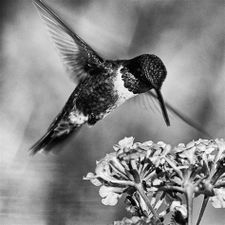

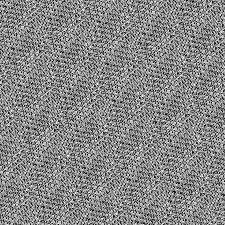

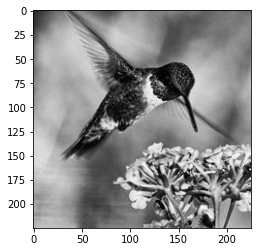

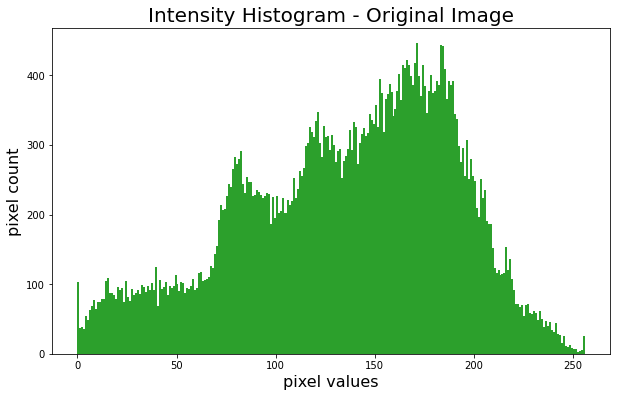

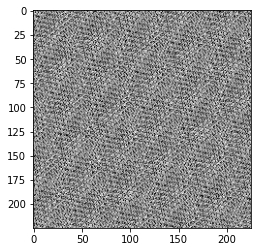

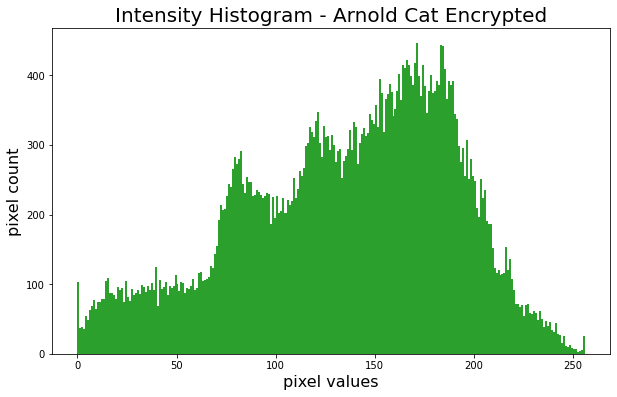

Entropy of ecrypted image 7.692756412202926
NPCR of encrypted image  99.13481481481482


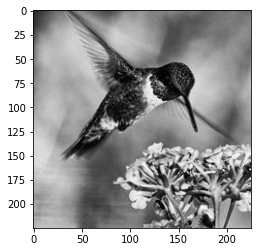

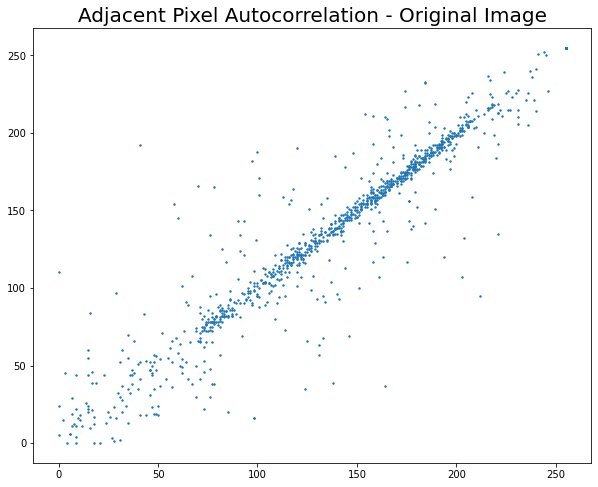

225


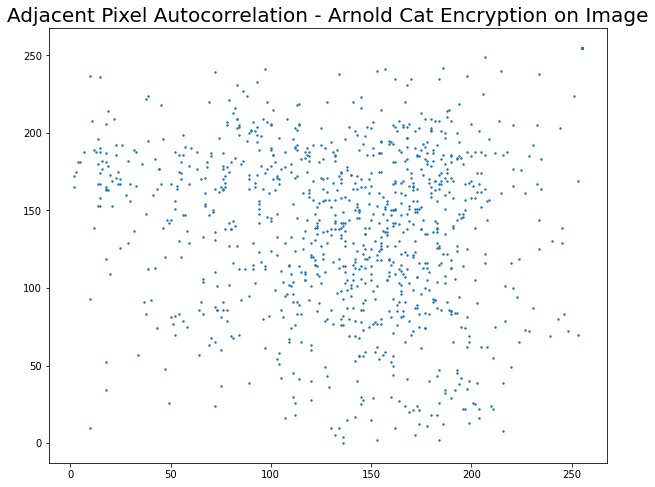

In [2]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from google.colab import files
from skimage.io import imread

# Downloading HorizonZero.png
!wget https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
!mv uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm HorizonZero.png

def entropy(im):
    # Compute normalized histogram -> p(g)
    p = np.array([(im==v).sum() for v in range(256)])
    p = p/p.sum()
    # Compute e = -sum(p(g)*log2(p(g)))
    e = -(p[p>0]*np.log2(p[p>0])).sum()
    
    return e

def rateofchange(height,width,pixel1,pixel2,matrix,i):

    for y in range(0,height):
        for x in range(0,width):
            #print(x,y)
            if pixel1[x,y][i] == pixel2[x,y][i]:
                matrix[x,y]=0
            else:
                matrix[x,y]=1
    return matrix

def sumofpixel(height,width,pixel1,pixel2,ematrix,i):
    matrix=rateofchange(height,width,pixel1,pixel2,ematrix,i)
    psum=0
    for y in range(0,height):
        for x in range(0,width):
            psum=matrix[x,y]+psum
    return psum

def npcrv(loc1,loc2):
    c1 = Image.open(loc1)
    c2 = Image.open(loc2)
    width, height = c1.size
    pixel1 = c1.load()
    pixel2 = c2.load()
    ematrix = np.empty([width, height])
    per=(((sumofpixel(height,width,pixel1,pixel2,ematrix,0)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,1)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,2)/(height*width))*100))/3
    return per

global key, plain_text, n
# Given text and key
plain_text = "0010"
key = input("Enter 4 bit key: ")


# n is the no: of bits to
# be considered at a time
n = 3

print("Plain text : ", plain_text)
print("Key : ", key)
print("n : ", n)

print(" ")

# The initial state vector array
S = [i for i in range(0, 2**n)]
print("S : ", S)

key_list = [key[i:i + n] for i in range(0, len(key), n)]

# Convert to key_stream to decimal
for i in range(len(key_list)):
        key_list[i] = int(key_list[i], 2)

# Convert to plain_text to decimal
global pt

pt = [plain_text[i:i + n] for i in range(0, len(plain_text), n)]

for i in range(len(pt)):
        pt[i] = int(pt[i], 2)

print("Plain text ( in array form ): ", pt)

# Making key_stream equal
# to length of state vector
diff = int(len(S)-len(key_list))

if diff != 0:
        for i in range(0, diff):
                key_list.append(key_list[i])

print("Key list : ", key_list)
print(" ")

# Perform the KSA algorithm
def KSA():
        j = 0
        N = len(S)
        
        # Iterate over the range [0, N]
        for i in range(0, N):
        
                # Find the key
                j = (j + S[i]+key_list[i]) % N
                
                # Update S[i] and S[j]
                S[i], S[j] = S[j], S[i]
                print(i, " ", end ="")
                
                # Print S
                print(S)

        initial_permutation_array = S
        
        print(" ")
        print("The initial permutation array is : ",
                initial_permutation_array)

print("KSA iterations : ")
print(" ")
KSA()
print(" ")

# Perform PGRA algorithm
def PGRA():

        N = len(S)
        i = j = 0
        global key_stream
        key_stream = []

        # Iterate over [0, length of pt]
        for k in range(0, len(pt)):
                i = (i + 1) % N
                j = (j + S[i]) % N
                
                # Update S[i] and S[j]
                S[i], S[j] = S[j], S[i]
                print(k, " ", end ="")
                print(S)
                t = (S[i]+S[j]) % N
                key_stream.append(S[t])

        # Print the key stream
        print("Key stream : ", key_stream)
        print(" ")

print("PGRA iterations : ")
print(" ")
PGRA()

# Performing XOR between generated
# key stream and plain text
def XOR():
        global cipher_text
        cipher_text = []
        for i in range(len(pt)):
                c = key_stream[i] ^ pt[i]
                cipher_text.append(c)

XOR()

# Convert the encrypted text to
# bits form
encrypted_to_bits = ""
for i in cipher_text:
        encrypted_to_bits += '0'*(n-len(bin(i)[2:]))+bin(i)[2:]
        sum = 0
        sum += int(encrypted_to_bits)
        sum /= 100
        Sum = int(sum)
print(Sum)
        

print(" ")
print("Cipher text : ", encrypted_to_bits)


def getImageMatrix(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color


def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    color = 1
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]  
    return img_arnold

def ArnoldCatEncryption(imageName, Sum):
    img = cv2.imread(imageName)
    for i in range (0, Sum):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img

uploaded = files.upload()
image = "bird.png"

image = "bird.png"
img = cv2.imread(image)
cv2_imshow(img)
print("\n")
ArnoldCatEncryptionIm = ArnoldCatEncryption(image, Sum)
cv2_imshow(ArnoldCatEncryptionIm)

img = cv2.imread(image,1) 
pil_im = Image.open(image, 'r')
imshow(np.asarray(pil_im))
b, g, r = cv2.split(img)

plt.figure(figsize=(10,6))
plt.hist(b.ravel(), 256, [0,256])
plt.hist(g.ravel(), 256, [0,256])
plt.hist(r.ravel(), 256, [0,256])
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

image1 = "bird_ArnoldcatEnc.png"
img = cv2.imread(image1,1) 
pil_im = Image.open(image1, 'r')
imshow(np.asarray(pil_im))
imshow(np.asarray(pil_im))
b, g, r = cv2.split(img)

plt.figure(figsize=(10,6))
plt.hist(b.ravel(), 256, [0,256])
plt.hist(g.ravel(), 256, [0,256])
plt.hist(r.ravel(), 256, [0,256])
plt.title('Intensity Histogram - Arnold Cat Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()
en = entropy(img)
print("Entropy of ecrypted image", en)

NPCR = npcrv("bird.png", "bird_ArnoldcatEnc.png")
print("NPCR of encrypted image ", NPCR)

image = "bird.png"
img = Image.open(image).convert('LA')
pil_im = Image.open(image, 'r')
imshow(np.asarray(pil_im))

image = "bird.png"
ImageMatrix, image_size, x, y = getImageMatrix_gray(image)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

image = "bird_ArnoldcatEnc.png"
ImageMatrix,image_size,x,y = getImageMatrix_gray(image)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Arnold Cat Encryption on Image', fontsize=20)
plt.show()